# Explore here

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
df = pd.read_csv(url)

In [3]:
df.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [4]:
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [10]:
df['diabetes_prevalence'].describe()

count    3140.000000
mean       13.073503
std         2.724351
min         6.100000
25%        11.200000
50%        12.800000
75%        14.800000
max        25.600000
Name: diabetes_prevalence, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


- Verificar valores nulos

In [6]:
df.isnull().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

- A mi parecer no tienen problemas los datos, pero son un poco raros por los valores que tienen, aunque entiendo que es por lo demográfico

- Vamos a dividir en variables las variables categóricas y numéricas

In [7]:
categoricas = df.select_dtypes(include=['object']).columns
numericas = df.select_dtypes(include=[np.number]).columns

- Dividimos el conjunto en "X" y "y"

In [12]:
X = df[numericas]
y = df['diabetes_prevalence']

- Visualizamos la distribución de valores en la variable objetivo

Text(0.5, 0, 'diabetes_prevalence')

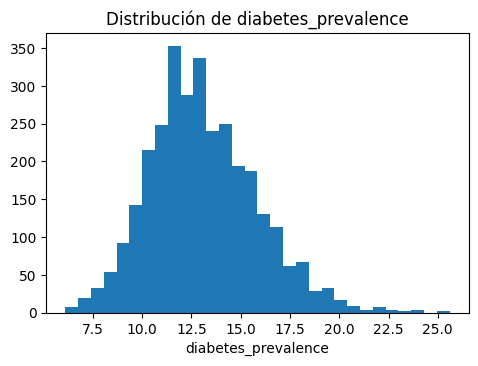

In [13]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(y, bins=30)
plt.title('Distribución de diabetes_prevalence')
plt.xlabel('diabetes_prevalence')

- Veamos las correlaciones de las características y la variable objetivo

In [14]:
correlations = X.corrwith(y).abs().sort_values(ascending=False)
correlations.head()

diabetes_prevalence      1.000000
diabetes_Upper 95% CI    0.998409
diabetes_Lower 95% CI    0.998069
CKD_Lower 95% CI         0.924630
CKD_prevalence           0.918514
dtype: float64

- Y aquí generamos un gráfico visual

Text(0.5, 1.0, 'Top 10 Correlaciones')

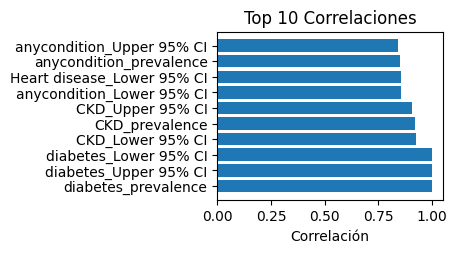

In [15]:
plt.subplot(2, 2, 2)
top_corr = correlations.head(10)
plt.barh(range(len(top_corr)), top_corr.values)
plt.yticks(range(len(top_corr)), top_corr.index)
plt.xlabel('Correlación')
plt.title('Top 10 Correlaciones')

### Entrenamiento del modelo

- Dividimos en train y test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- También escalamos las para que sea 0 y 1

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Y entrenamos el modelo de regresión lineal

In [18]:
modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)
y_pred = modelo.predict(X_test_scaled)

- Tengo que sacar los valores r2 y el error cuadrático medio

In [20]:
r2_lr = r2_score(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)

r2_lr

1.0

In [21]:
mse_lr

2.7652840712635914e-29

- El valor de 1 de r2 significa que el modelo se ajustó perfectamente a los datos
- El valor del error medio cuadrático también es bastante bueno ya que es muy pequeño, lo que quiere decir que los datos están lo más cercano a la regresión

### Optimización con diferentes valores de alpha

In [22]:
alphas = np.logspace(-3, 1.3, 50)  # desde 0.001 hasta ~20
valores_r2 = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=42)
    lasso.fit(X_train_scaled, y_train)
    y_pred = lasso.predict(X_test_scaled)
    valores_r2.append(r2_score(y_test, y_pred))

mejor_alpha_id = np.argmax(valores_r2)
mejor_alpha = alphas[mejor_alpha_id]
mejor_r2 = valores_r2[mejor_alpha_id]

mejor_alpha

np.float64(0.001)

In [23]:
mejor_r2

0.9999996959581074

- Aquí se puede ver que el mejor valor de alpha en este caso es de "0.001", y que el mejor score es prácticamente 1 como lo estábamos viendo

- Ahora sí se va a optimizar con grid search

In [25]:
grid = {'alpha': np.logspace(-4, 2, 20)}

grid_search = GridSearchCV(
    Lasso(random_state=42),
    grid,
    cv=5,
    scoring='r2'
)

grid_search.fit(X_train_scaled, y_train)
y_pred_grid = grid_search.predict(X_test_scaled)

r2_grid = r2_score(y_test, y_pred_grid)
mse_grid = mean_squared_error(y_test, y_pred_grid)

In [26]:
grid_search.best_params_['alpha']

np.float64(0.00042813323987193956)

In [27]:
r2_grid

0.9999999319503035

In [28]:
mse_grid

5.473340493585625e-07

- Aquí si notamos que el alpha cambió y dio uno mucho más específico
- Lo que cambió aquí fue que el error medio cuadrático, es mayor

- Vamos a ver si cambia con el random search

In [29]:
dist = {'alpha': np.logspace(-4, 2, 1000)}

random_search = RandomizedSearchCV(
    Lasso(random_state=42),
    dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=42
)

random_search.fit(X_train_scaled, y_train)
y_pred_random = random_search.predict(X_test_scaled)

r2_random = r2_score(y_test, y_pred_random)
mse_random = mean_squared_error(y_test, y_pred_random)

In [30]:
random_search.best_params_['alpha']

np.float64(0.00037720424934169976)

In [31]:
r2_random

0.9999999468446982

In [32]:
mse_random

4.2753617016193e-07

- Con los dos se notaron cambios, diferentes alphas, el r2 es prácticamente 1 pero el error medio cuadrático sí cambia, son diferentes en los dos, en este caso del random search es menor que el de grid search, pero se obtuvo un menor error medio cuadrático con el modelo sin optimizar